<a href="https://colab.research.google.com/github/suongnhibrady/school-projects/blob/main/Capstone_Project_CSCI118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#an exploration of NYC public computer centers
#python capstone project
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
#how does the number of resources offered by public computer centers compare in each borough?
#what borough provides the most resources on average?
df = pd.read_csv('/content/drive/MyDrive/Citywide_Public_Computer_Centers_CY2023.csv')

In [156]:
df.head()

,Calendar Year,Object Identification Number,Oversight Agency,Location Name,Operating Status,Address Number,Address Prefix,Address Street,Address Suffix,City,...,"Certifications (ex: in software, in housing, in professional areas, etc.)",Digital Literacy,Latitude,Longitude,Community District,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2023,0,BPL,ADAMS STREET,Open,9,NaN,Adams,Street,Brooklyn,...,No,No,40.704110,-73.988443,302,33,3329396.0,3.000180e+09,2100,BK0202
1,2023,1,DFTA,RAICES TIMES PLAZA NEIGHBORHOOD SENIOR CENTER,Temporarily closed,460,NaN,Atlantic,Avenue,Brooklyn,...,NaN,NaN,40.686198,-73.982959,302,33,3000937.0,3.001840e+09,4100,BK0202
2,2023,2,DYCD,INGERSOLL,Open,177,NaN,Myrtle,Street,Brooklyn,...,No,No,40.693787,-73.982041,302,35,NaN,NaN,1501,BK0202
3,2023,3,BPL,BROOKLYN HEIGHTS,Open,109,NaN,Remsen,Street,Brooklyn,...,No,Yes,40.695683,-73.991348,302,33,3002076.0,3.002490e+09,502,BK0201
4,2023,4,DFTA,CCNS ST CHARLES NEIGHBORHOOD SENIOR CENTER,Open,55,NaN,Pierrepont,Street,Brooklyn,...,No,No,40.695783,-73.995117,302,33,3001825.0,3.002368e+09,501,BK0201


In [157]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 34 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Calendar Year                                                                 530 non-null    int64  
 1   Object Identification Number                                                  530 non-null    int64  
 2   Oversight Agency                                                              530 non-null    object 
 3   Location Name                                                                 530 non-null    object 
 4   Operating Status                                                              530 non-null    object 
 5   Address Number                                                                530 non-null    object 
 6   Address Prefix                    

In [158]:
#counting resource data
dfResources = df[['Wheelchair Accessible', 'Assistive Technology', 'Languages Offered',
    'Technology Related Courses', 'Affordability Connectivity Program',
    'Productivity Tools (ex:  Using Word, Excel, Powerpoint, Adobe Acrobat, etc.)',
    'Job Readiness (ex: resume help, job search, etc.)',
    'Education (ex: personal growth, k-12 supports, reading research, etc.)',
    'Creative Expression  (ex: making art, videos, blogs, websites, etc.)',
    'Media and Entertainment (ex: consuming, producing, etc.)',
    'Certifications (ex: in software, in housing, in professional areas, etc.)',
    'Digital Literacy']]

In [166]:
#cleaning
dfResources = dfResources.fillna('No')
dfResources = dfResources.replace(
    to_replace=r'(?i)^Not Sure$', value='No', regex=True
)

In [160]:
#the number of 'yes' values per row across all resource columns
df['Total Resources'] = dfResources.apply(lambda row: (row == 'Yes').sum(), axis=1)

In [161]:
#number of resources categories
def categories(x):
    if x <= 3:
        return '0-3'
    elif x <= 7:
        return '4-7'
    else:
        return '8-12'

df['numResources'] = df['Total Resources'].apply(categories)

In [162]:
#number of centers per borough per category
resourceCounts = df.groupby(['Borough', 'numResources']).size().unstack(fill_value=0)
resourceCounts = resourceCounts.loc[:, ['0-3', '4-7', '8-12']]

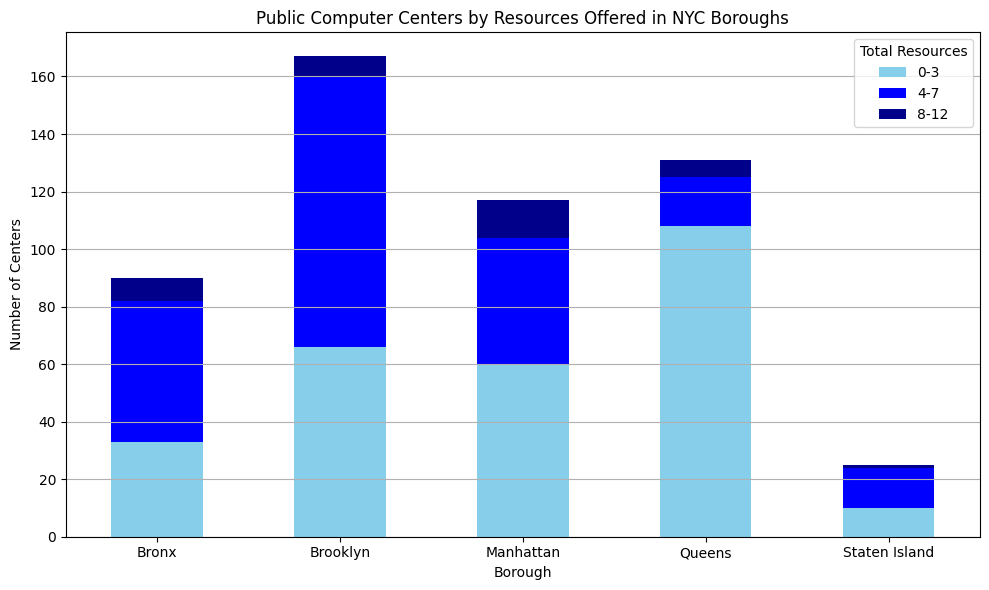

In [163]:
#visualization
resourceCounts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'blue', 'darkblue']
)

plt.title('Public Computer Centers by Resources Offered in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Centers')
plt.legend(title='Total Resources')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [167]:
print(df.groupby('Borough')['Total Resources'].mean().sort_values(ascending=False))

Borough
Bronx            4.222222
Brooklyn         4.047904
Manhattan        3.991453
Staten Island    3.880000
Queens           2.648855
Name: Total Resources, dtype: float64


In [168]:
topLocations = df.sort_values(by='Total Resources', ascending=False)
topLocations[['Location Name', 'Borough', 'Total Resources']].head()

,Location Name,Borough,Total Resources
66,TOMPKINS PARK NEIGHBORHOOD SENIOR CENTER,Brooklyn,10
491,CHELSEA,Manhattan,9
494,STARVOS NIARCHOS FOUNDATION LIBRARY,Manhattan,9
461,WOODSIDE NEIGHBORHOOD SENIOR CENTER,Queens,9
497,ANDREW HEISKELL,Manhattan,9
